In [1]:
import torch as th
import torch.nn as nn

from typing import Tuple

In [ ]:
new_block = nn.Sequential(
    nn.ConvTranspose2d(
        32, 32,
        kernel_size=(3, 3),
        stride=(2, 2),
        padding=(1, 1),
        output_padding=(1, 1)
    ),
    nn.ReLU(),

    nn.ConvTranspose2d(
        32, 24,
        kernel_size=(3, 3),
        stride=(1, 1),
        padding=(1, 1)
    ),
    nn.ReLU(),

    nn.ConvTranspose2d(
        24, 1,
        kernel_size=(1, 1),
        stride=(1, 1),
        padding=(0, 0)
    ),
    nn.Tanh()
)

last_block = nn.Sequential(
    nn.ConvTranspose2d(
        32, 1,
        kernel_size=(1, 1),
        stride=(1, 1),
        padding=(0, 0)
    ),
    nn.Tanh(),
    nn.Upsample(
        scale_factor=2,
        mode="nearest"
    )
)

In [ ]:
new_block[0].weight.size()

In [ ]:
new_block[0].weight[:, :, 1, 1]

In [ ]:
with th.no_grad():
    new_block[0].weight.zero_()
    new_block[0].weight[:, :, 1, 1] = th.eye(32, 32)

In [ ]:
new_block[0].weight[:, :, 1, 1]

In [ ]:
last_block[0].weight[:, :, 0, 0]

# Code Thierry

In [3]:
"""
Created on Sun May 15 14:11:27 2022

@author: thierry
"""

import numpy as np

def multiple(A,p):
    
    n,q = A.shape
    if min(n,q)>p:
        print('On fait une ACP...')
        
    U,D,V = np.linalg.svd(A, full_matrices=True)

    DD = np.zeros(p)
    DD[:min([n,p,q])] = np.sqrt(D[:min([n,p,q])])
    D1 = np.zeros((n,p))
    np.fill_diagonal(D1,DD)
    D2 = np.zeros((p,q))  
    np.fill_diagonal(D2,DD)
    
    G = np.random.normal(size=(p,p))
    G = G+np.transpose(G)   
    E,W = np.linalg.eigh(G)
    
    B = np.matmul(U,np.matmul(D1,W))
    C = np.matmul(np.transpose(W),np.matmul(D2,V))    
    
    return(B,C)

In [87]:
def fill_diag(m: th.Tensor, v: th.Tensor) -> th.Tensor:
    mask = th.diag(th.ones_like(v))
    full_mask = th.zeros(*m.size())
    start, end = min(full_mask.size()[0], mask.size()[0]), min(full_mask.size()[1], mask.size()[1])
    full_mask[:start, :end] = mask[:start, :end]
    
    diag = th.diag(v)
    full_diag = th.zeros(*m.size())
    start, end = min(full_diag.size()[0], diag.size()[0]), min(full_diag.size()[1], diag.size()[1])
    full_diag[:start, :end] = diag[:start, :end]
    
    return full_mask * full_diag + (1. - full_mask) * m

def decomposition(m: th.Tensor, p: int) -> Tuple[th.Tensor, th.Tensor]:
    n, q = m.size()[-2:]
    
    u, d, v = th.linalg.svd(m, full_matrices=True)
    
    d_diag = th.zeros(p)
    d_diag[:min(n, p, q)] = th.sqrt(d[:min(n, p, q)])
    
    d1 = th.zeros(n, p)
    d1 = fill_diag(d1, d_diag)
    
    d2 = th.zeros(p, q)
    d2 = fill_diag(d2, d_diag)
    
    g = th.randn(p, p)
    g = g + g.transpose(1, 0)
    e, w = th.linalg.eigh(g)
    
    b = u @ (d1 @ w)
    c = w.transpose(1, 0) @ (d2 @ v)
    
    return b, c

In [88]:
m = th.randn(64, 2)

In [89]:
m_1, m_2 = decomposition(m, 56)

In [28]:
def round(t: th.Tensor, decimals=0) -> th.Tensor:
    return (t * 10 ** decimals).round() / (10 ** decimals)

In [93]:
round(m_1 @ m_2, decimals=5) == round(m, decimals=5)

tensor([[False,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [False,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True, False],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True,  True],
        [ True, 

In [72]:
th.__version__

'1.10.2+cu113'

In [41]:
conv = nn.ConvTranspose2d(
    32, 32,
    kernel_size=(3, 3),
    stride=(2, 2),
    padding=(1, 1),
    output_padding=(1, 1)
)

In [42]:
nn.init.zeros_(conv.weight)
nn.init.zeros_(conv.bias)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [43]:
conv.weight.data[:, :, 1:, 1:] = (
    th.eye(32)[:, :, None, None]
    .repeat(1, 1, 2, 2)
)

In [44]:
conv.weight.data[:, :, 1, 1]

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [45]:
v = th.ones(1, 32, 2, 2)
v[:, :, 0, 0] = 1
v[:, :, 1, 0] = 2
v[:, :, 0, 1] = 3
v[:, :, 1, 1] = 4
o = conv(v)

In [46]:
o

tensor([[[[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
          [2., 2., 4., 4.]],

         [[1., 1., 3., 3.],
          [1., 1., 3., 3.],
          [2., 2., 4., 4.],
    

In [47]:
conv = nn.Conv2d(
    32, 32,
    kernel_size=(3, 3),
    stride=(2, 2),
    padding=(1, 1)
)

In [48]:
nn.init.zeros_(conv.weight)
nn.init.zeros_(conv.bias)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [49]:
conv.weight.data[:, :, 1:, 1:] = (
    th.eye(32)[:, :, None, None]
    .repeat(1, 1, 2, 2) / 4
)

In [50]:
o = conv(o)

In [51]:
o

tensor([[[[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2., 4.]],

         [[1., 3.],
          [2.,

# Code Sam

In [25]:
from music_gan.networks import matrix_multiple

import torch as th
import torch.nn as nn

In [35]:
def round(t: th.Tensor, decimals=0) -> th.Tensor:
    return (t * 10 ** decimals).round() / (10 ** decimals)

In [33]:
a = th.randn(256, 2)
b, c = matrix_multiple(a, 224)

v = th.randn(4, 256)

In [34]:
round(v @ b @ c, decimals=4) == round(v @ a, decimals=4)

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True]])

In [ ]:
a[round(b @ c, decimals=5) != round(a, decimals=5)]

In [ ]:
(b @ c)[round(b @ c, decimals=5) != round(a, decimals=5)]

In [ ]:
a[round(b @ c, decimals=5) != round(a, decimals=5)]

In [ ]:
(b @ c)[round(b @ c, decimals=5) != round(a, decimals=5)]

# Test DecBlock

In [1]:
from music_gan.networks import ToMagnPhase, GenBlock, FromMagnPhase, DiscBlock, matrix_multiple

import torch as th
import torch.nn as nn

import matplotlib.pyplot as plt

In [2]:
to_mp = ToMagnPhase(32)

In [3]:
new_block = GenBlock(32, 24)
new_to_mp = ToMagnPhase(24)

In [4]:
b = to_mp.conv.bias.data
m = to_mp.conv.weight.data[:, :, 0, 0]

factor_1, factor_2 = matrix_multiple(m, 24)

new_to_mp.from_layer(factor_2, b)
new_block.from_layer(factor_1)

In [5]:
x = th.randn(1, 32, 2, 2)

In [6]:
out_old = to_mp(x)
out_new = new_to_mp(new_block(x, 1.0))

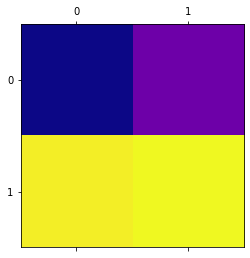

In [7]:
plt.matshow(out_old[0, 0, :, :].detach(), cmap="plasma")

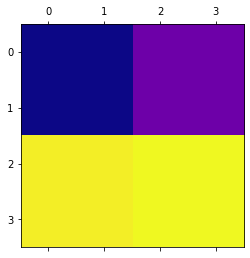

In [8]:
plt.matshow(out_new[0, 0, :, :].detach(), cmap="plasma")

In [13]:
from_mp = FromMagnPhase(32)

In [14]:
new_from_mp = FromMagnPhase(24)
new_block = DiscBlock(24, 32)

In [17]:
b = from_mp.conv.bias.data
m = from_mp.conv.weight.data[:, :, 0, 0].transpose(1, 0)

factor_1, factor_2 = matrix_multiple(m, 24)

new_from_mp.from_layer(factor_1.transpose(1, 0))
new_block.from_layer(factor_2.transpose(1, 0), b)

In [19]:
out_disc_old = from_mp(out_old, 2e-1)

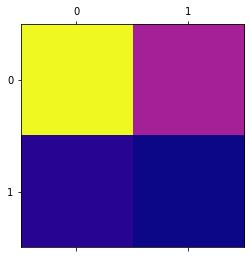

In [24]:
plt.matshow(out_disc_old[0, 1, :, :].detach(), cmap="plasma")

In [21]:
out_disc_new = new_block(new_from_mp(out_new, 1.0), 1.0)

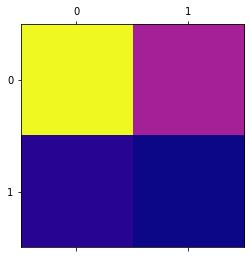

In [23]:
plt.matshow(out_disc_new[0, 1, :, :].detach(), cmap="plasma")

# test conv

In [ ]:
import torch.nn as nn

In [ ]:
c = nn.ConvTranspose2d(
    2, 8, kernel_size=(3, 3)
)

In [ ]:
c.weight.size()

In [8]:
a[round(b @ c, decimals=5) != round(a, decimals=5)]

tensor([ 2.1386, -1.1690, -0.5908])

In [9]:
(b @ c)[round(b @ c, decimals=5) != round(a, decimals=5)]

tensor([ 2.1386, -1.1690, -0.5908])

# test conv

In [2]:
import torch.nn as nn

In [5]:
c = nn.ConvTranspose2d(
    2, 8, kernel_size=(3, 3)
)

In [6]:
c.weight.size()

torch.Size([2, 8, 3, 3])

In [3]:
l=nn.Linear(32, 2)

In [4]:
l.weight.size()

torch.Size([2, 32])